<a href="https://colab.research.google.com/github/AdriMA3/G2TAREA/blob/main/tareaparte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1

In [2]:
!pip install geopandas

In [3]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 133.5 MB/s eta 0:00:00


In [9]:
import geopandas as gpd
from fiona import listlayers
countries=gpd.read_file("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/maps/World_Countries/World_Countries.shp")
#ferrovias=gpd.read_file("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/maps/Red_Ferroviaria/Red_ferroviaria.shp")

In [10]:
chile=countries[countries.COUNTRY=="Chile"]
chile_5361=chile.to_crs(5361)

In [12]:
airports=pd.read_csv("https://github.com/AdriMA3/introgeodf/raw/refs/heads/main/data/chile-airports.csv")

In [13]:
airports=gpd.GeoDataFrame(data=airports.copy(),
                 geometry=gpd.points_from_xy(airports.longitude_deg,
                                             airports.latitude_deg),
                 crs=chile.crs.to_epsg())
airports_5361=airports.to_crs(5361)

In [14]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [15]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [16]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)# notice it is unprojected

# keep Brazil
seaports_chi=seaports[seaports['Country Code']=='Chile'].copy()

# reset indexes
seaports_chi.reset_index(drop=True, inplace=True)

# reprojecting
seaports_chi_5361=seaports_chi.to_crs(5361) # projected crs

In [19]:
print(airports.columns)


Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'icao_code', 'iata_code', 'local_code',
       'home_link', 'wikipedia_link', 'keywords', 'score', 'last_updated',
       'geometry'],
      dtype='object')


In [25]:
# subsetting
mediumAirports=airports[airports['type']=='medium_airport'] #can't use "airports.type"
mediumAirports.reset_index(drop=True, inplace=True)
mediumAirports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated,geometry
0,6009,SCCI,medium_airport,President Carlos Ibañez del Campo Internationa...,-53.002602,-70.854599,139.0,SA,Chile,CL,...,SCCI,SCCI,PUQ,NaN,NaN,https://en.wikipedia.org/wiki/Carlos_Ibanez_De...,NaN,750,2021-12-22T15:07:05+00:00,POINT (-70.8546 -53.0026)
1,6043,SCTE,medium_airport,El Tepual Airport,-41.438900,-73.094002,294.0,SA,Chile,CL,...,SCTE,SCTE,PMC,NaN,NaN,https://en.wikipedia.org/wiki/El_Tepual_Airport,NaN,750,2008-07-12T07:26:32+00:00,POINT (-73.094 -41.4389)
2,6026,SCIP,medium_airport,Mataveri Airport,-27.164801,-109.421997,227.0,SA,Chile,CL,...,SCIP,SCIP,IPC,NaN,NaN,https://en.wikipedia.org/wiki/Mataveri_Interna...,"Rapa Nui, Easter Island",750,2011-10-28T10:05:26+00:00,POINT (-109.422 -27.1648)
3,6007,SCCF,medium_airport,El Loa Airport,-22.498199,-68.903603,7543.0,SA,Chile,CL,...,SCCF,SCCF,CJC,NaN,NaN,https://en.wikipedia.org/wiki/El_Loa_Airport,NaN,750,2024-04-29T19:45:32+00:00,POINT (-68.9036 -22.4982)
4,6018,SCFA,medium_airport,Andrés Sabella Gálvez International Airport,-23.444501,-70.445099,455.0,SA,Chile,CL,...,SCFA,SCFA,ANF,NaN,NaN,https://en.wikipedia.org/wiki/Andr%C3%A9s_Sabe...,Cerro Moreno Airport,750,2019-02-15T15:15:06+00:00,POINT (-70.4451 -23.4445)


In [27]:
# Reproyectar ambos GeoDataFrames a CRS proyectado para Chile
seaports_chi_5361 = seaports_chi.to_crs(epsg=5361)
mediumAirports_5361 = mediumAirports.to_crs(epsg=5361)


In [29]:
# Crear matriz de distancias (km) con índices organizados
distanceMatrixKM = seaports_chi_5361.set_index('portName').geometry.apply(
    lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
)

# Ordenar por índices para que se vea ordenado
distanceMatrixKM = distanceMatrixKM.sort_index(axis=0).sort_index(axis=1)

# Mostrar parte de la matriz
distanceMatrixKM.head()


name,Andrés Sabella Gálvez International Airport,Balmaceda Airport,Barriles Airport,Captain Fuentes Martinez Airport,Carriel Sur Airport,Cañal Bajo Carlos Hott Siebert Airport,Chacalluta Airport,Chañaral Airport,Chile Chico Airport,Cochrane Airport,...,Mataveri Airport,Nuevo Chaitén Airport,Panguilemo Airport,Pichoy Airport,President Carlos Ibañez del Campo International Airport,Ricardo García Posada Airport,Teniente Vidal Airport,Vallenar Airport,Victoria Airport,Viña del Mar Airport
portName,,,,,,,,,,,,,,,,,,,,,
Antofagasta,22.940637,2472.864745,170.961872,3285.596330,1477.370401,1897.808345,586.939017,297.737139,2546.887085,2625.362563,...,4213.139786,2134.261522,1305.090964,1792.593794,3258.036259,301.950756,2439.421551,549.012137,1628.965043,1035.910135
Bahia Agua Fresca,3323.291208,832.129552,3467.953403,45.485040,1853.910946,1429.114399,3887.468225,3003.357477,758.093206,692.682429,...,4601.174929,1187.154111,2001.452201,1535.633295,43.019862,3006.846332,870.228448,2752.489579,1686.170806,2270.533143
Bahia De Valdivia,1833.539735,691.687551,1981.761205,1512.472356,336.845978,91.604626,2395.295895,1514.434726,764.655835,829.431954,...,3888.592172,333.329655,512.292563,21.816091,1479.466825,1531.082734,650.913648,1264.368041,189.571032,777.107154
Bahia De Valparaiso,1068.946150,1430.651373,1216.684847,2248.722965,435.704955,851.304473,1632.011796,749.240496,1504.811883,1580.688617,...,3955.007034,1087.922271,260.147625,746.470033,2219.386102,766.305626,1395.631570,498.816608,582.382233,15.902885
Bahia Harris,3374.743679,886.830961,3519.008142,66.910109,1909.247021,1485.162268,3938.813770,3054.994445,812.998363,750.297332,...,4656.461753,1243.387734,2054.599389,1591.509722,98.045533,3057.503553,925.876234,2804.315216,1740.697091,2323.383383


In [31]:
distanceMatrixKM_sea_air = (
    seaports_chi_5361.set_index('portName').geometry.apply(
        lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
    )
).sort_index(axis=0).sort_index(axis=1)


In [36]:
port_point=seaports_chi_5361[seaports_chi_5361['portName']== "Bahia Harris"]
closest_point1=mediumAirports[mediumAirports['name']=='President Carlos Ibañez del Campo International Airport']
closest_point2=mediumAirports[mediumAirports['name']=='Captain Fuentes Martinez Airport']

In [38]:
# Reproyectar puntos individuales
port_point_proj = port_point.to_crs(epsg=5361)
closest_point1_proj = closest_point1.to_crs(epsg=5361)
closest_point2_proj = closest_point2.to_crs(epsg=5361)


<Axes: >

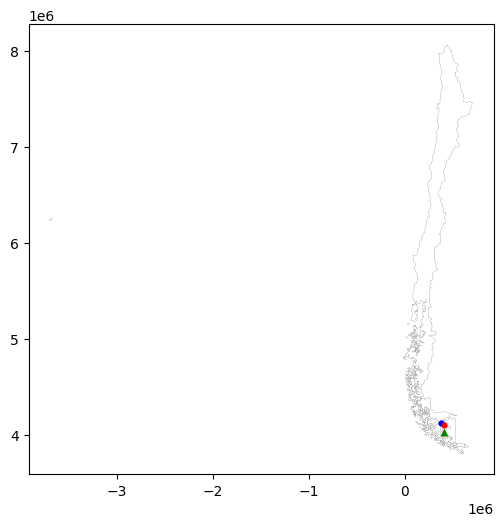

In [39]:
base=chile_5361.plot(facecolor='white',
                 edgecolor='black',
                 linewidth=0.1,
                 figsize=(6,6))
port_point.plot(facecolor='green',linewidth=0,marker="^",
                ax=base,markersize=30,zorder=5)
closest_point1_proj.plot(facecolor='blue',linewidth=0,
                ax=base,markersize=20,zorder=5)
closest_point2_proj.plot(facecolor='red',linewidth=0,
                ax=base,markersize=20,zorder=5)

Ejercicio 2

In [46]:
import geopandas as gpd
from fiona import listlayers
hidrografia=gpd.read_file("https://github.com/AdriMA3/Tarea2G/raw/refs/heads/main/maps/Red_Hidrografica/Red_Hidrografica.shp")

In [47]:
#asignaremos un crs conocido para luego poroyectar
# Asegurar que ambos estén en el mismo CRS antes del clip
hidrografia_aligned = hidrografia.to_crs(chile.crs)

# Realizar el clip
hidrografiaChile_clipped = gpd.clip(hidrografia_aligned, chile)

# Luego proyectar al CRS deseado (por ejemplo EPSG:5361)
hidrografia_chile_5361 =  hidrografiaChile_clipped.to_crs(5361)

In [49]:
hidrografia_chile_5361.head()

,objectid,fid_drenes,cod_comuna,shape_leng,st_length_,Nombre,Dren_Tipo,Region,Provincia,Comuna,geometry
4243,4286,31936,1240,9673.323324,15831.851676,Río Volcan,Río,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"LINESTRING (189727.27 4184887.299, 189760.717 ..."
4242,4285,31936,1240,0.002220,0.003612,Río Volcan,Río,Región de Magallanes y Antártica Chilena,Ultima Esperanza,Natales,"LINESTRING (189727.268 4184887.298, 189727.27 ..."
3106,3149,68837,1130,2246.652440,3381.047573,None,Quebrada,Región de Aysén del Gral.Ibañez del Campo,Capitán Prat,Tortel,"LINESTRING (152514.392 4626409.814, 152571.086..."
3093,3136,68799,1130,1505.446980,2266.294719,None,Quebrada,Región de Aysén del Gral.Ibañez del Campo,Capitán Prat,Tortel,"LINESTRING (152514.392 4626409.814, 152497.027..."
2941,2968,68685,1130,1163.005615,1750.726277,None,Quebrada,Región de Aysén del Gral.Ibañez del Campo,Capitán Prat,Tortel,"LINESTRING (151852.068 4627342.785, 151871.722..."


In [55]:
# Seleccionar el río
single_line = hidrografia_chile_5361[hidrografia_chile_5361['Nombre'] == 'Río Volcan']

# Calcular distancias en km del río a todos los aeropuertos medianos
distanceMatrixKM_hidro = (
    single_line.set_index('Nombre').geometry.apply(
        lambda g: mediumAirports_5361.set_index('name').geometry.distance(g) / 1000
    )
).sort_index(axis=0)

# Mostrar resultado
distanceMatrixKM_hidro


name,President Carlos Ibañez del Campo International Airport,El Tepual Airport,Mataveri Airport,El Loa Airport,Andrés Sabella Gálvez International Airport,Diego Aracena Airport,Balmaceda Airport,La Florida Airport,Desierto de Atacama Airport,Chacalluta Airport,...,Viña del Mar Airport,Chañaral Airport,Chile Chico Airport,Captain Fuentes Martinez Airport,Panguilemo Airport,Las Breas Airport,Vallenar Airport,Nuevo Chaitén Airport,Barriles Airport,Victoria Airport
Nombre,,,,,,,,,,,,,,,,,,,,,
Río Volcan,191.041139,1219.950585,4395.029503,3342.303390,3225.716669,3548.854965,733.603823,2505.494207,2801.685469,3789.602662,...,2168.110341,2905.439258,660.640989,234.511907,1898.503935,2991.855506,2654.163181,1071.381411,3372.193828,1576.836478
Río Volcan,194.981921,1219.950585,4395.029501,3342.508387,3225.748145,3548.895438,733.965003,2505.494207,2801.706883,3789.612040,...,2168.110341,2905.474895,661.075725,238.390204,1898.503935,2991.913871,2654.200975,1071.381411,3372.260089,1576.836478
Río Volcan,187.499808,1220.299335,4400.639220,3341.896185,3225.489617,3548.618136,733.051097,2505.326628,2801.469589,3789.397850,...,2167.966803,2905.208412,660.014422,231.064002,1898.341339,2991.600911,2653.930596,1071.558047,3371.930458,1576.895195
Río Volcan,189.071192,1220.315269,4398.739622,3342.267597,3225.731013,3548.866636,733.524022,2505.533934,2801.702844,3789.623259,...,2168.164823,2905.452494,660.539305,232.567191,1898.545913,2991.862155,2654.175882,1071.635387,3372.198096,1577.017498
Río Volcan,186.520260,1219.215611,4402.013832,3340.629100,3224.285359,3547.410304,731.738642,2504.139479,2800.269478,3788.201329,...,2166.784457,2904.002936,658.678104,230.179542,1897.155933,2990.386993,2652.724626,1070.439713,3370.713303,1575.751446
Río Volcan,2118.034101,875.867850,4106.602797,1269.480266,1161.306169,1482.597729,1336.993190,458.142005,741.652933,1724.874910,...,175.271130,842.739640,1410.609785,2144.911981,217.239722,926.445525,594.336724,1012.099330,1304.709991,522.531145
Río Volcan,2121.016784,878.689617,4106.530687,1267.852392,1159.696159,1480.981734,1339.954974,456.623438,740.062534,1723.260476,...,174.438190,841.138715,1413.574103,2147.897360,219.380281,924.836044,592.754061,1014.981912,1303.092555,525.233684
Río Volcan,2122.639069,880.289196,4106.348454,1265.930458,1157.719653,1479.014031,1341.583070,454.629497,738.070597,1721.290154,...,172.964928,839.153280,1415.202019,2149.517019,220.706763,922.858899,590.759036,1016.598540,1301.127534,526.792787
Río Volcan,2124.592399,882.055885,4105.862021,1262.581684,1154.428830,1475.706406,1343.500913,451.564994,734.831294,1717.986988,...,171.331036,835.886805,1417.123488,2151.477334,221.929637,919.569545,587.539383,1018.424833,1297.815713,528.453140


In [56]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 6.8 MB/s eta 0:00:00


In [63]:
closest_airports=mediumAirports_5361[mediumAirports_5361['name']=='President Carlos Ibañez del Campo International Airport']
farthest_airports=mediumAirports_5361[mediumAirports_5361['name']=='Andrés Sabella Gálvez International Airport']

In [67]:
farthest_airport = mediumAirports[mediumAirports['name'] =='Andrés Sabella Gálvez International Airport']
farthest_airport_5361 = farthest_airport.to_crs(epsg=5361)


In [68]:
# Mapa interactivo del río
m = single_line.explore(color='black', tooltip='Nombre')  # ¡Usa 'Nombre' con mayúscula!

# Agregar puertos con sus nombres también
closest_airports.explore(m=m, color='red', marker_kwds=dict(radius=5), tooltip='name')
farthest_airport_5361.explore(m=m, color='green', marker_kwds=dict(radius=5), tooltip='name')



ejercicio 3